<a name='top'></a>
# Exploration Exercises

<a href='#wrangle'>1. / 2. Wrangle data</a>

<a href='#vizpairplots'>3. `plot_variable_pairs`</a>

<a href='#plotcategoricalandcontinuousvars'> 4. `plot_categorical_and_continuous_vars` </a>

<a href='#explorepy'>5. `explore.py`</a>

<a href='#exploring'>6. exploring</a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations, product
import numpy as np
import pandas as pd
from scipy import stats
from pydataset import data

import wrangle as w

<a name='wrangle'></a>
1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

Get the data via `wrangle`

In [2]:
df = w.wrangle_zillow_data()
train, validate, test = w.split_zillow_data(df)

Returning saved csv file.


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169019 entries, 1174234 to 418158
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    1169019 non-null  uint8  
 1   bathroomcnt                   1169019 non-null  float64
 2   calculatedfinishedsquarefeet  1169019 non-null  uint64 
 3   yearbuilt                     1169019 non-null  uint64 
 4   taxvaluedollarcnt             1169019 non-null  uint64 
 5   taxamount                     1169019 non-null  float64
 6   county                        1169019 non-null  object 
dtypes: float64(2), object(1), uint64(3), uint8(1)
memory usage: 63.5+ MB


<a href='#top'> Top </a>

<a name = 'vizpairplots'></a>

3. Write a function named `plot_variable_pairs` that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

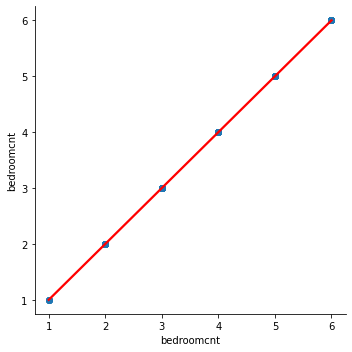

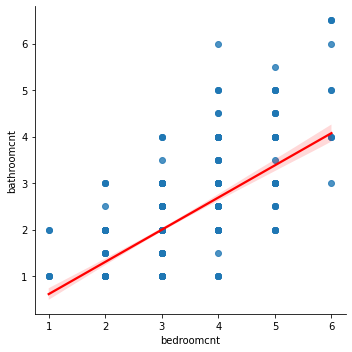

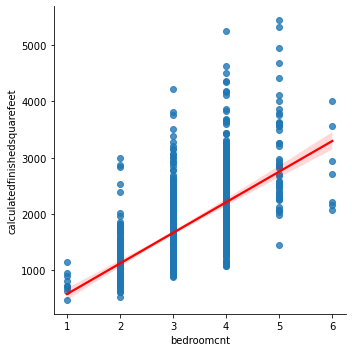

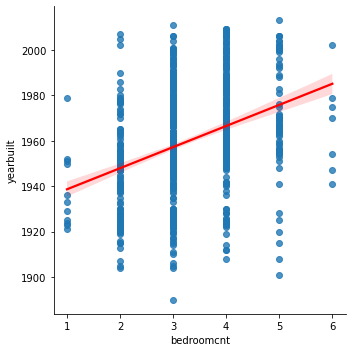

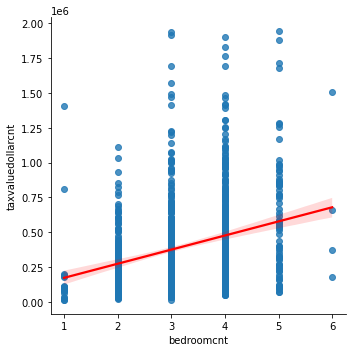

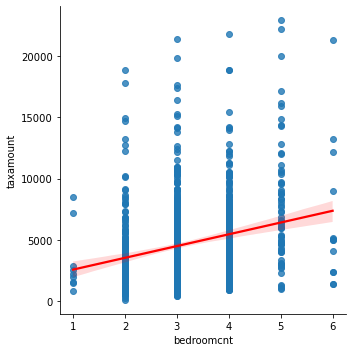

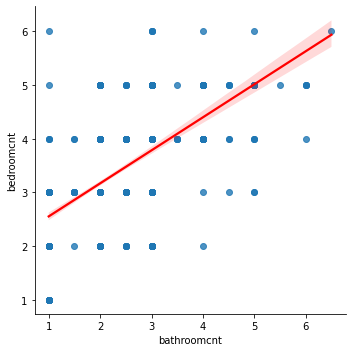

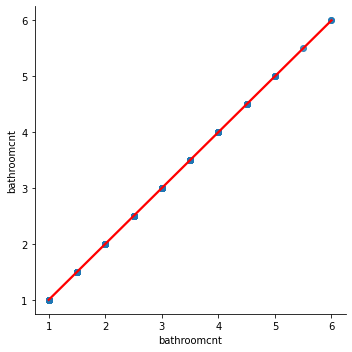

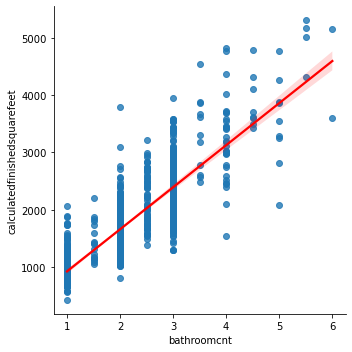

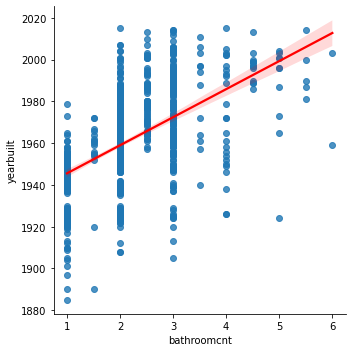

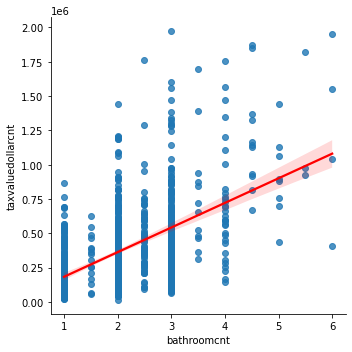

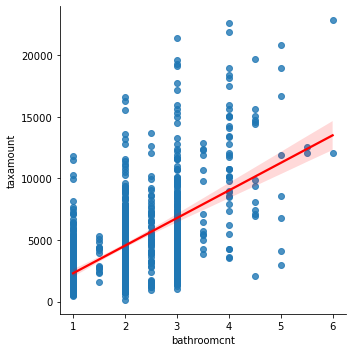

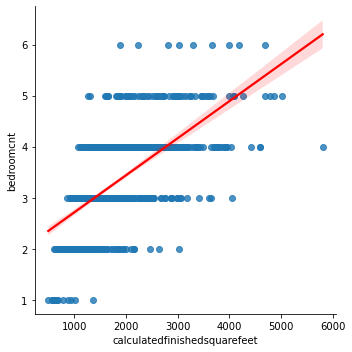

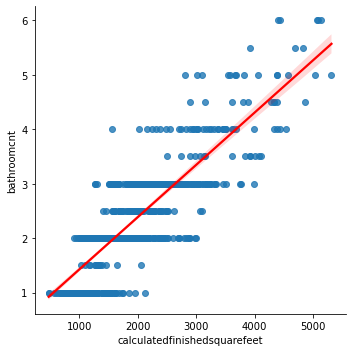

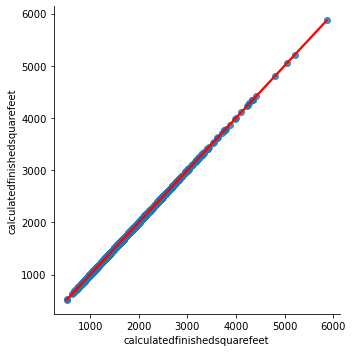

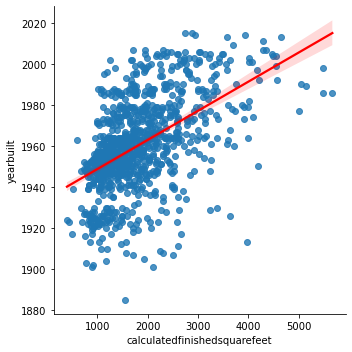

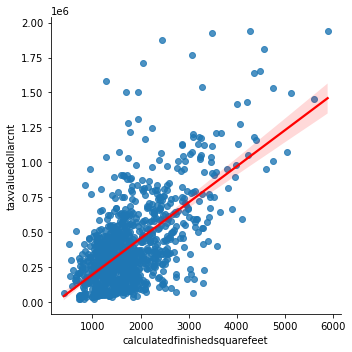

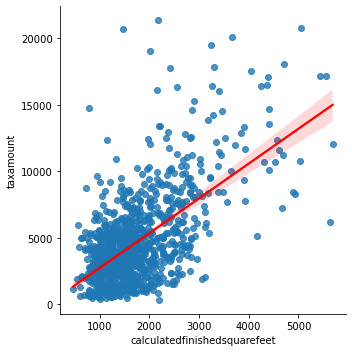

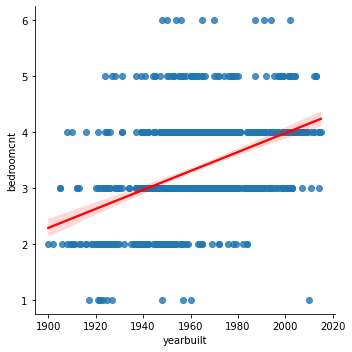

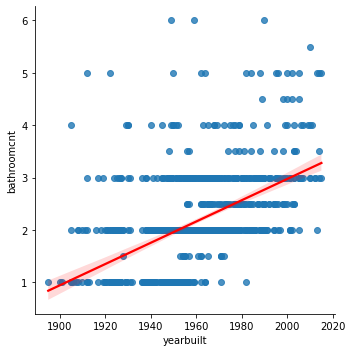

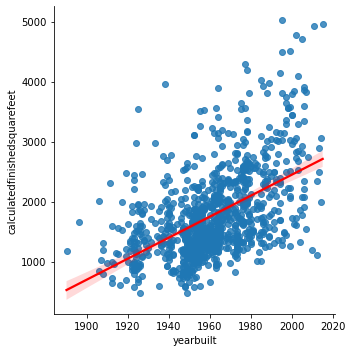

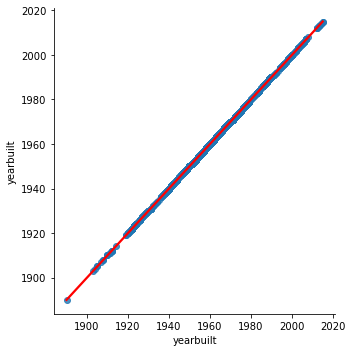

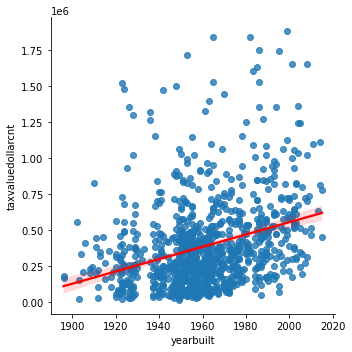

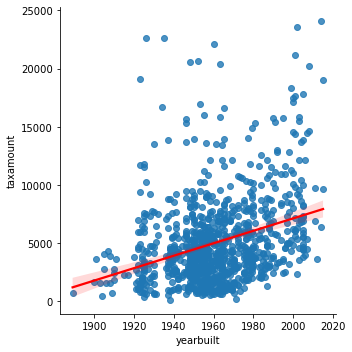

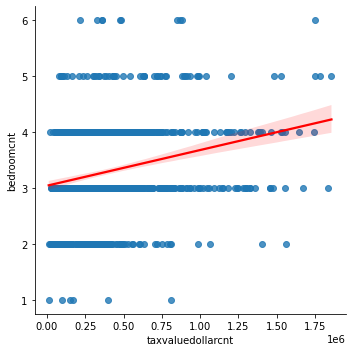

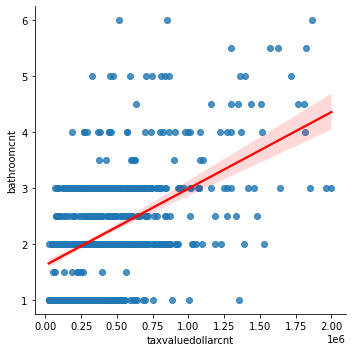

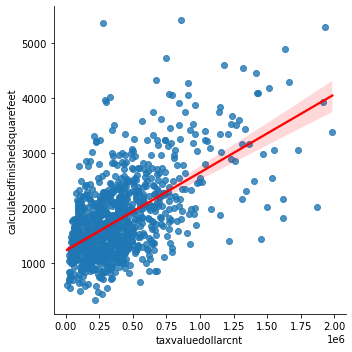

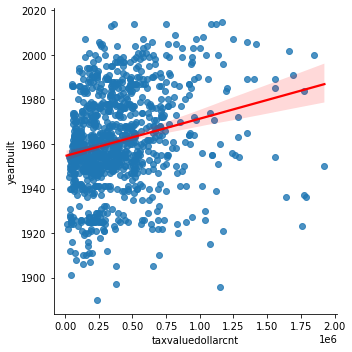

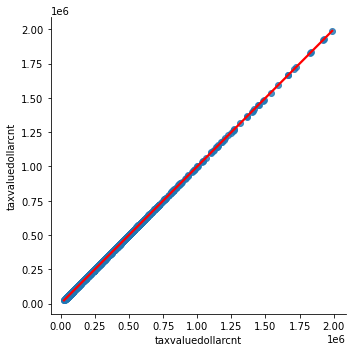

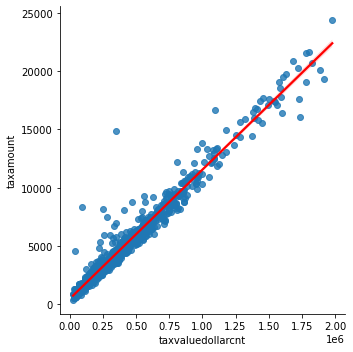

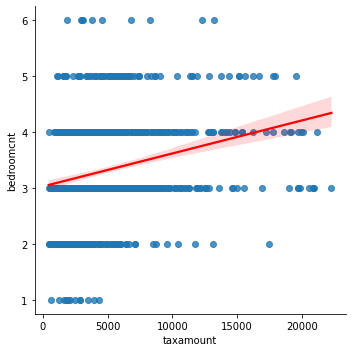

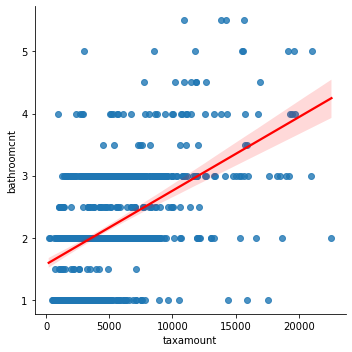

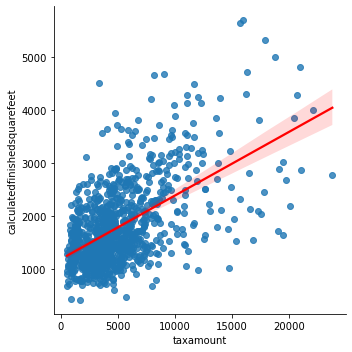

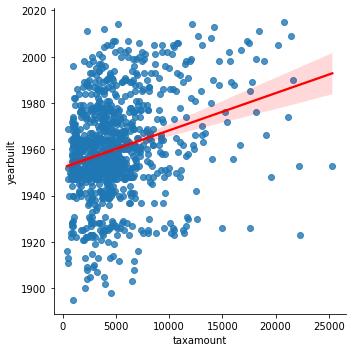

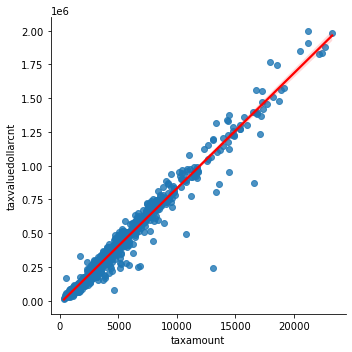

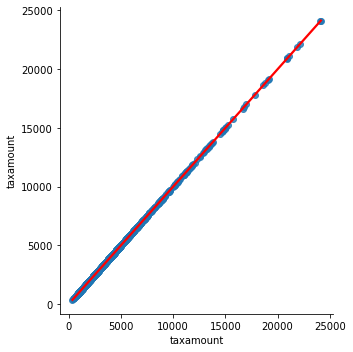

In [4]:
def plot_variable_pairs(df,
                        columns_x = ['bedroomcnt','bathroomcnt','calculatedfinishedsquarefeet','yearbuilt','taxvaluedollarcnt','taxamount'],
                        columns_y = ['bedroomcnt','bathroomcnt','calculatedfinishedsquarefeet','yearbuilt','taxvaluedollarcnt','taxamount'],
                        sampling = 1000):
    pairs = product(columns_x, columns_y)
    for pair in pairs:
        sns.lmplot(x=pair[0], y=pair[1], data=df.sample(sampling), line_kws={'color': 'red'})
        plt.show()

plot_variable_pairs(train)

<a href='#top'> Top </a>

<a name='plotcategoricalandcontinuousvars'></a>
4. Write a function named `plot_categorical_and_continuous_vars` that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

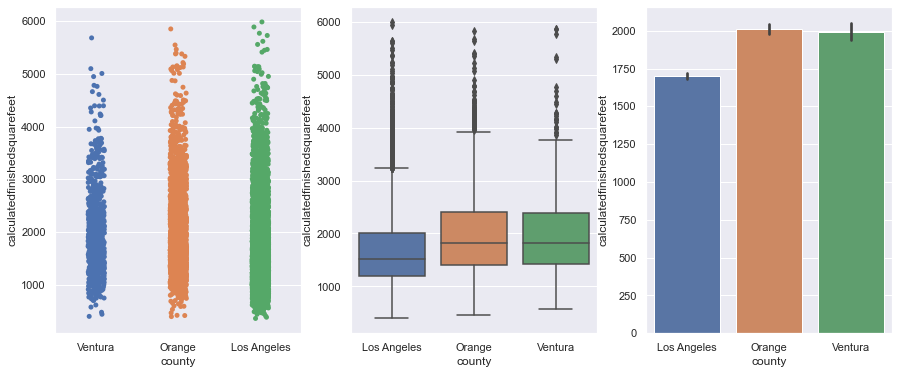

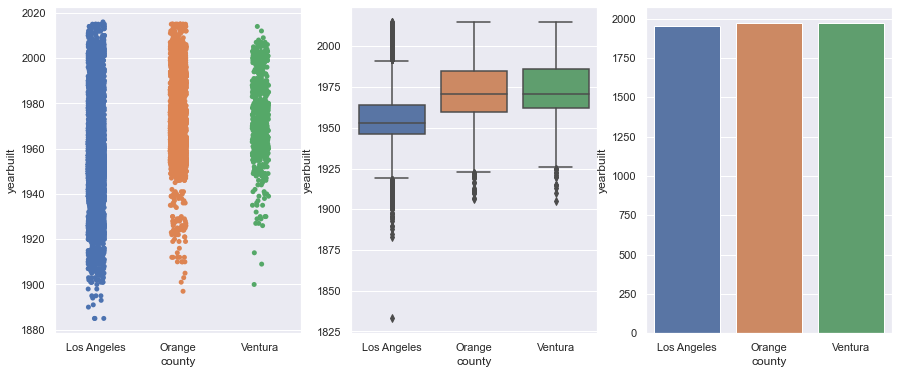

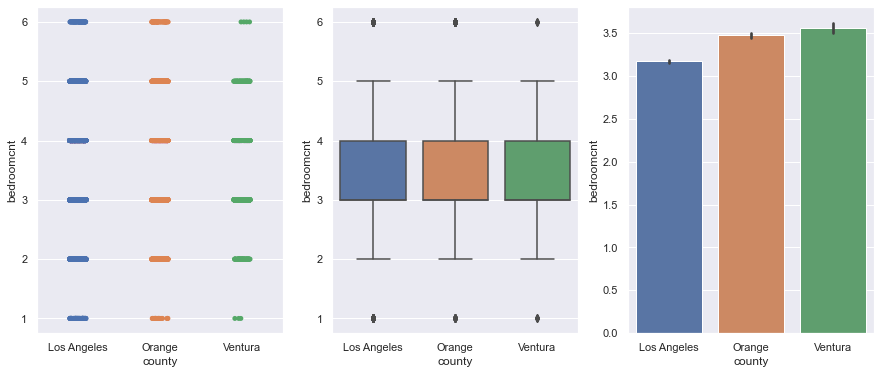

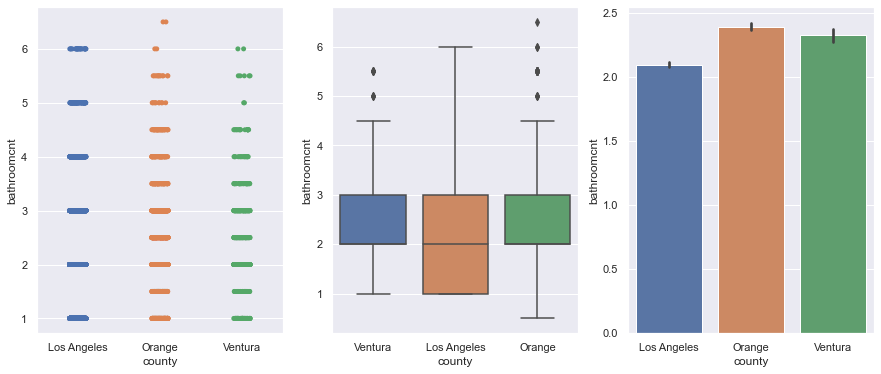

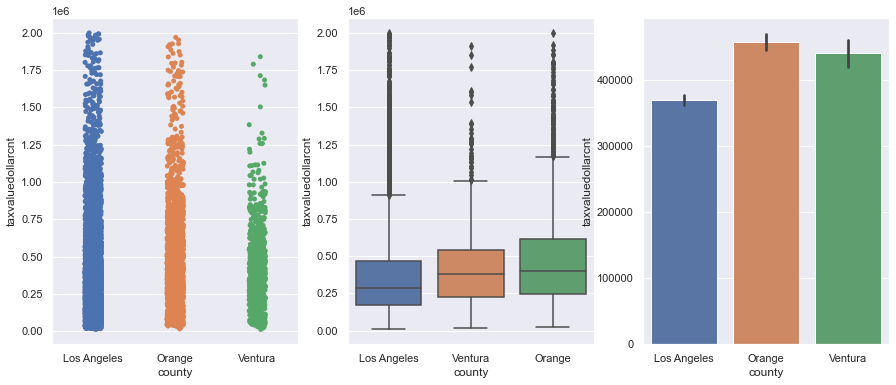

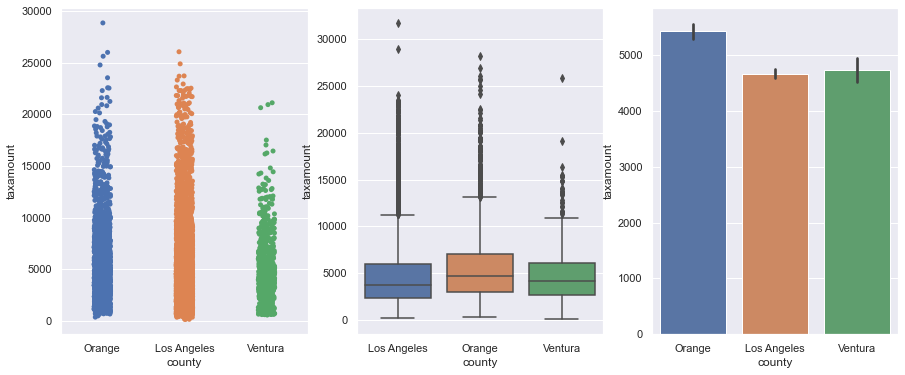

In [5]:
def plot_categorical_and_continuous_vars(df,
                                         columns_cat=['county'],
                                         columns_cont=['calculatedfinishedsquarefeet', 'yearbuilt', 'bedroomcnt', 'bathroomcnt', 'taxvaluedollarcnt', 'taxamount'],
                                         sampling = 1000):
    pairs = product(columns_cat, columns_cont)
    for pair in pairs:
        sns.set(rc={"figure.figsize":(15, 6)}) 
        fig, axes = plt.subplots(1, 3)
        
        sns.stripplot(x=pair[0], y=pair[1], data=df.sample(sampling), ax = axes[0])
        sns.boxplot(x=pair[0], y=pair[1], data=df.sample(sampling), ax = axes[1])
        sns.barplot(x=pair[0], y=pair[1], data=df.sample(sampling), ax = axes[2])
        
        plt.show

plot_categorical_and_continuous_vars(train, sampling = 10_000)

<a href='#top'> Top </a>

<a name='explorepy'></a>
5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.


In [6]:
import explore

In [7]:
# explore.plot_variable_pairs(train)

In [8]:
# explore.plot_categorical_and_continuous_vars(train)

<a href='#top'> Top </a>

<a name='exploring'></a>
6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

Consider all the variables plotted against the target variable

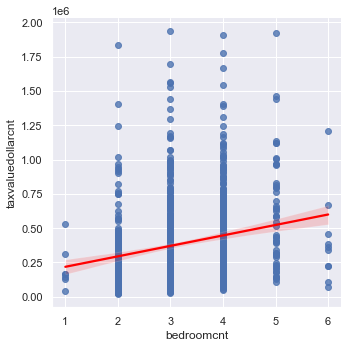

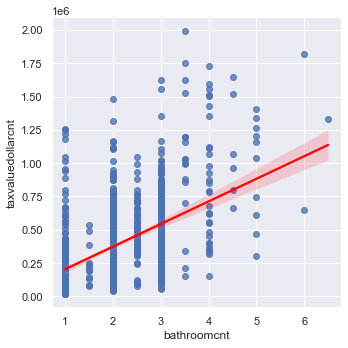

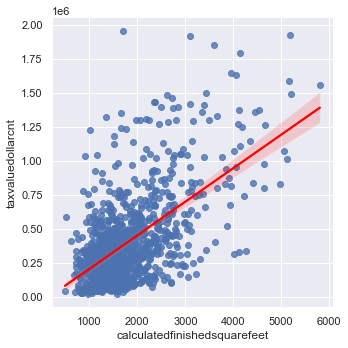

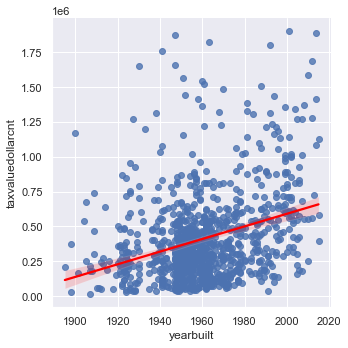

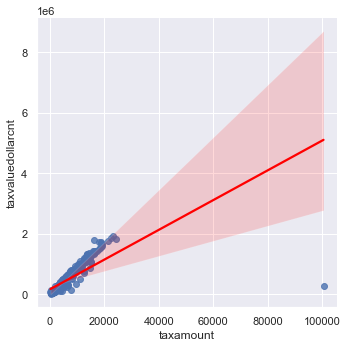

In [9]:
explore.plot_variable_pairs(train, columns_y=['taxvaluedollarcnt'], columns_x=['bedroomcnt','bathroomcnt','calculatedfinishedsquarefeet','yearbuilt','taxamount'])

All appear to be positively correlated.  Consider the histograms of the data.

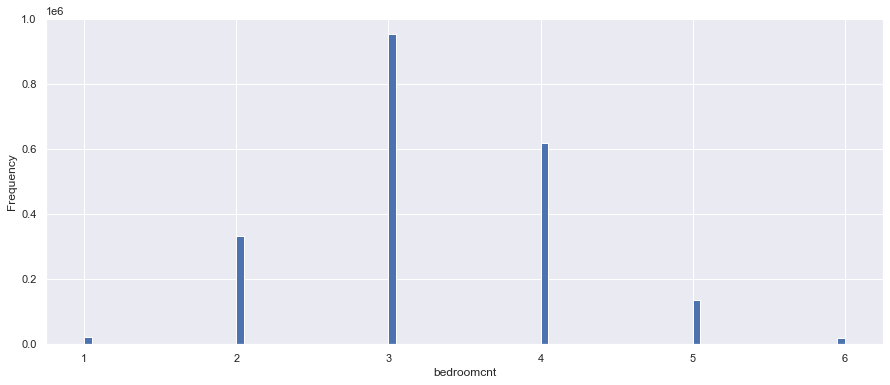

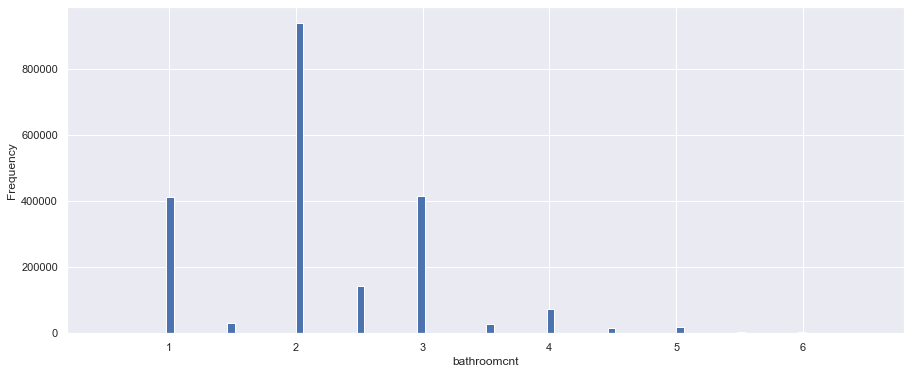

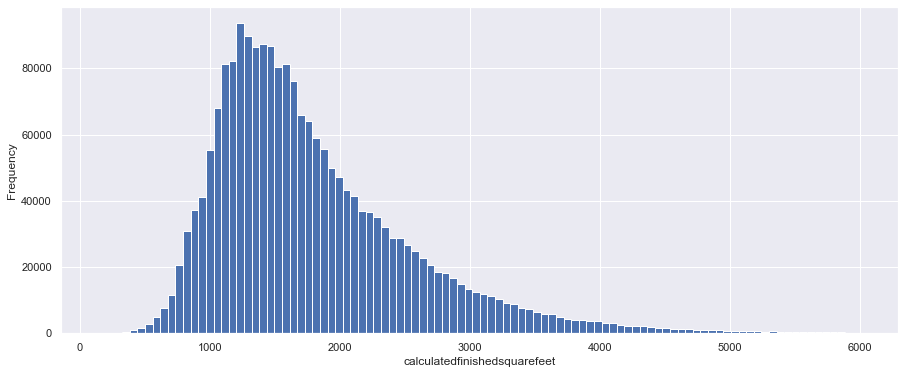

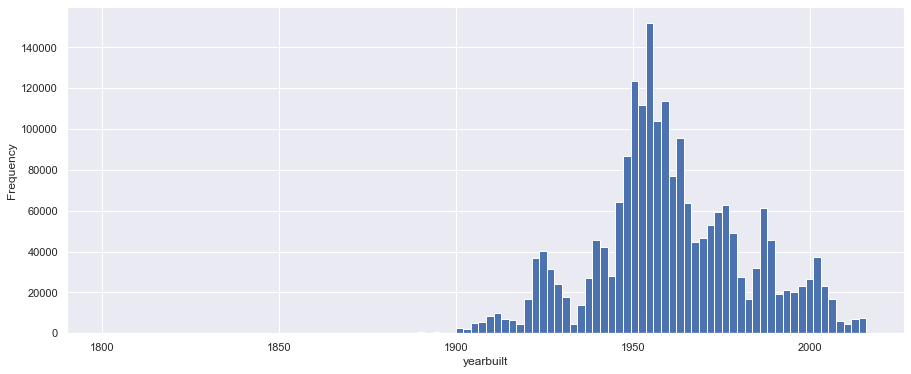

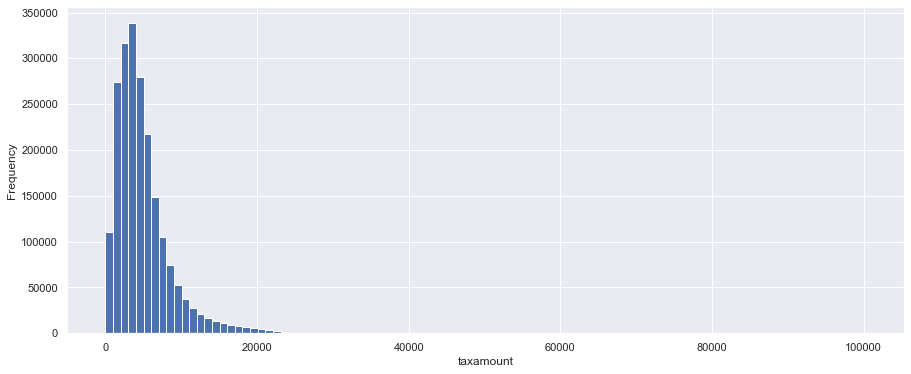

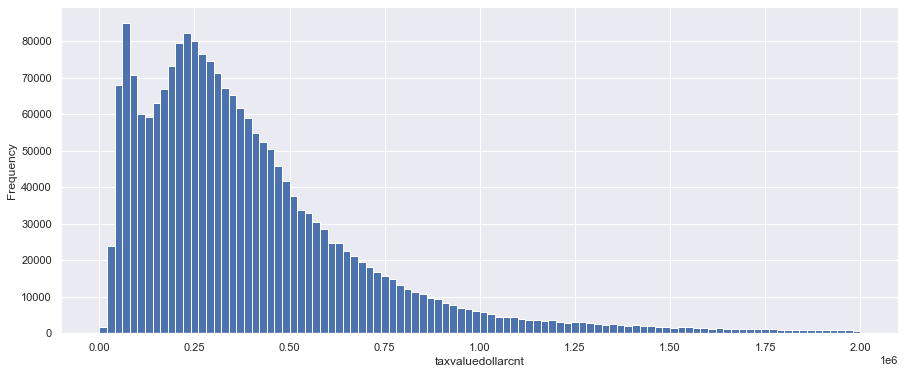

In [10]:
columns = ['bedroomcnt','bathroomcnt','calculatedfinishedsquarefeet','yearbuilt','taxamount','taxvaluedollarcnt']
for column in columns:
    df[column].plot.hist(bins=100)
    plt.xlabel(column)
    plt.show()

Look a little closer at square feet. There are so many outliers, it might be better to exclude them from the data?  Need to go back to cut off the data. (NB: went back and cut off the houses that were over 6000 square feet, leaving 0.96 of the data).

In [11]:
df['calculatedfinishedsquarefeet'].describe()

count    2.087536e+06
mean     1.793481e+03
std      7.679453e+02
min      1.520000e+02
25%      1.252000e+03
50%      1.607000e+03
75%      2.158000e+03
max      6.000000e+03
Name: calculatedfinishedsquarefeet, dtype: float64

<AxesSubplot:ylabel='Frequency'>

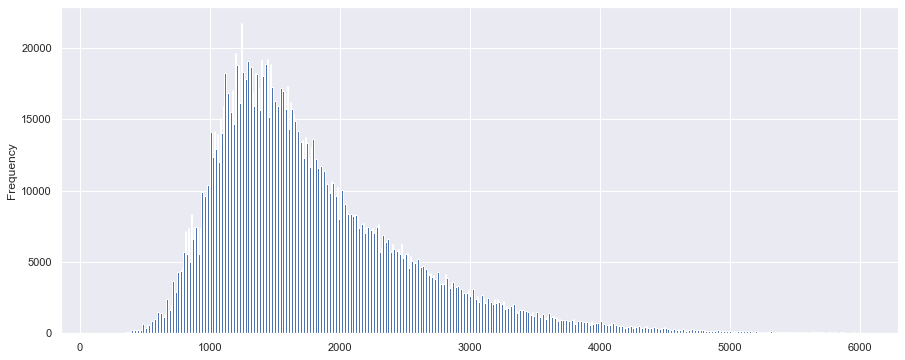

In [12]:
df[df['calculatedfinishedsquarefeet'] < 20_000]['calculatedfinishedsquarefeet'].plot.hist(bins=500)

<a name='corrtests'></a>

Hypothesis test against all the continuous variables. Use correlation. This establishes if there is a linear correlation. Calculate the $r$ value too.

$H_0$ : There is not linear correlation between column1 and column2.

In [14]:
columns = ['bedroomcnt','bathroomcnt','calculatedfinishedsquarefeet','yearbuilt','taxamount','taxvaluedollarcnt']
pairs = combinations(columns, 2)
alpha = 0.05
outputs = []
for pair in pairs:
    corr, p = stats.pearsonr(train[pair[0]], train[pair[1]])
    output = {
        'column1_x_column2':f"{pair[0]} x {pair[1]}",
        'r' : corr,
        'p-value' : p,
        'reject_null' : p < alpha
    }
    outputs.append(output)
corr_tests = pd.DataFrame(outputs)
corr_tests.sort_values('r', ascending=False)

,column1_x_column2,r,p-value,reject_null
14,taxamount x taxvaluedollarcnt,0.976078,0.0,True
5,bathroomcnt x calculatedfinishedsquarefeet,0.823408,0.0,True
0,bedroomcnt x bathroomcnt,0.623842,0.0,True
1,bedroomcnt x calculatedfinishedsquarefeet,0.618744,0.0,True
11,calculatedfinishedsquarefeet x taxvaluedollarcnt,0.584173,0.0,True
10,calculatedfinishedsquarefeet x taxamount,0.581010,0.0,True
6,bathroomcnt x yearbuilt,0.537905,0.0,True
7,bathroomcnt x taxamount,0.509811,0.0,True
8,bathroomcnt x taxvaluedollarcnt,0.508109,0.0,True
9,calculatedfinishedsquarefeet x yearbuilt,0.484680,0.0,True


In [15]:
corr_tests.sort_values('r', ascending=False)

,column1_x_column2,r,p-value,reject_null
14,taxamount x taxvaluedollarcnt,0.976078,0.0,True
5,bathroomcnt x calculatedfinishedsquarefeet,0.823408,0.0,True
0,bedroomcnt x bathroomcnt,0.623842,0.0,True
1,bedroomcnt x calculatedfinishedsquarefeet,0.618744,0.0,True
11,calculatedfinishedsquarefeet x taxvaluedollarcnt,0.584173,0.0,True
10,calculatedfinishedsquarefeet x taxamount,0.581010,0.0,True
6,bathroomcnt x yearbuilt,0.537905,0.0,True
7,bathroomcnt x taxamount,0.509811,0.0,True
8,bathroomcnt x taxvaluedollarcnt,0.508109,0.0,True
9,calculatedfinishedsquarefeet x yearbuilt,0.484680,0.0,True


Looks like `calculatedfinishedsquarefeet` is a good predictor of `taxvaluedollarcnt`.



Consider the grouped subsets of the counties.  Is there a difference between the other values?  

$H_0$ : The mean for value_x is different between county_x and not county_x.

In [16]:
counties = set(df.county.values)
pairs = product(counties, columns)
outputs = []
for pair in pairs:
    #subset into county_x and not county_x
    county_x = train[train.county == pair[0]][pair[1]]
    not_county_x = train[~(train.county == pair[0])][pair[1]].mean()
    #do the stats test
    t, p = stats.ttest_1samp(county_x, not_county_x)
    output = {
        'county':pair[0],
        'column':pair[1],
        'p':p,
        'reject_null': p < alpha
    }
    outputs.append(output)
pd.DataFrame(outputs)

,county,column,p,reject_null
0,Los Angeles,bedroomcnt,0.000000e+00,True
1,Los Angeles,bathroomcnt,0.000000e+00,True
2,Los Angeles,calculatedfinishedsquarefeet,0.000000e+00,True
3,Los Angeles,yearbuilt,0.000000e+00,True
4,Los Angeles,taxamount,0.000000e+00,True
5,Los Angeles,taxvaluedollarcnt,0.000000e+00,True
6,Orange,bedroomcnt,0.000000e+00,True
7,Orange,bathroomcnt,0.000000e+00,True
8,Orange,calculatedfinishedsquarefeet,0.000000e+00,True
9,Orange,yearbuilt,0.000000e+00,True


The null is likely false for all of them.

This is clear from the bar graphs:

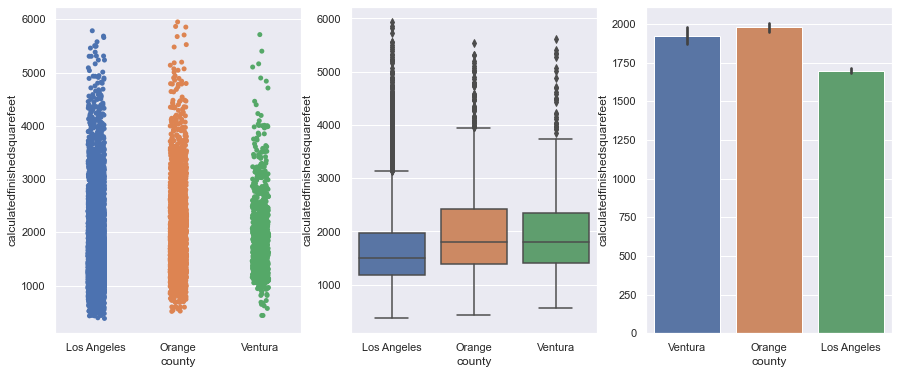

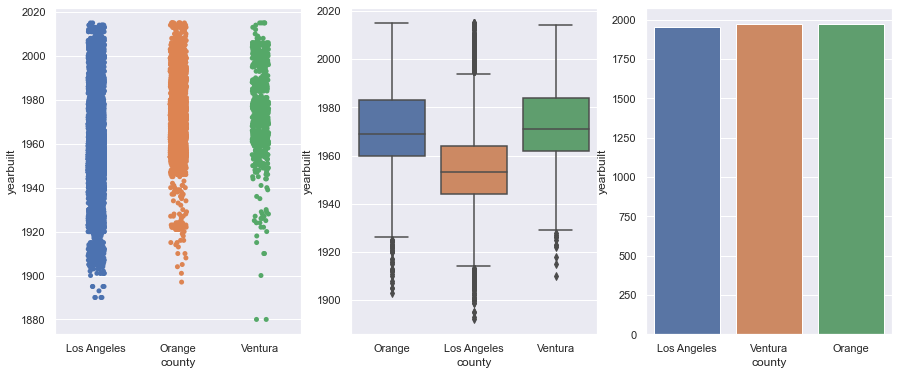

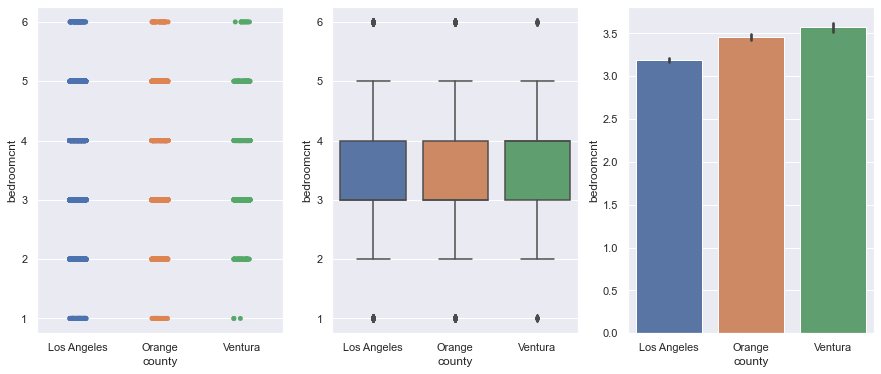

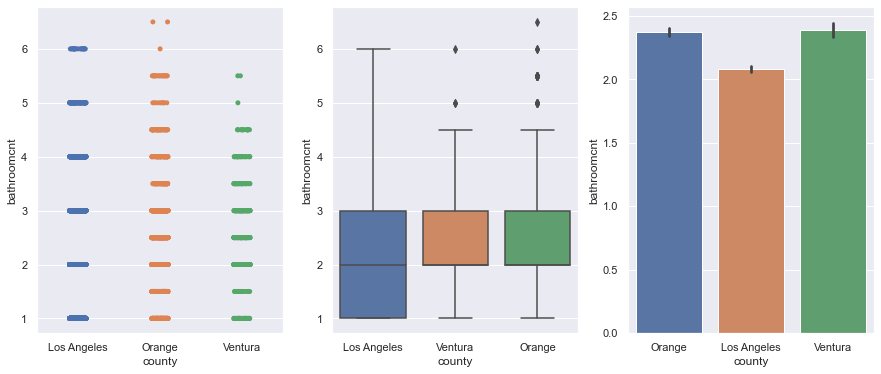

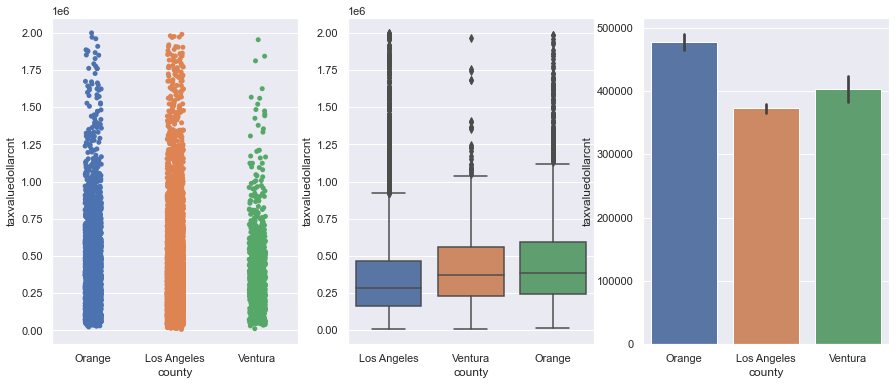

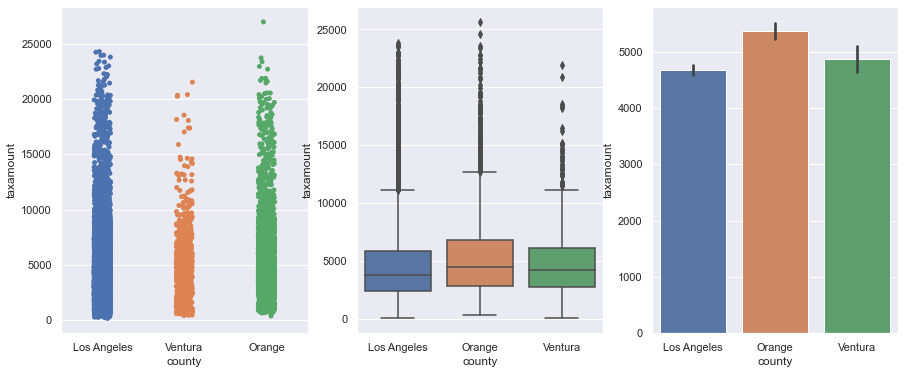

In [17]:
explore.plot_categorical_and_continuous_vars(train, sampling = 10_000)

Consider the minumum number of rooms (bedrooms + bathrooms) and `taxvaluedollarcnt`.

In [18]:
train['min_rooms'] = train['bedroomcnt'] + train['bathroomcnt']


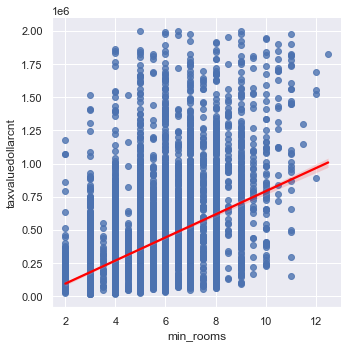

In [21]:
sns.lmplot(y='taxvaluedollarcnt', x='min_rooms', data=train.sample(10_000), line_kws={'color': 'red'})
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

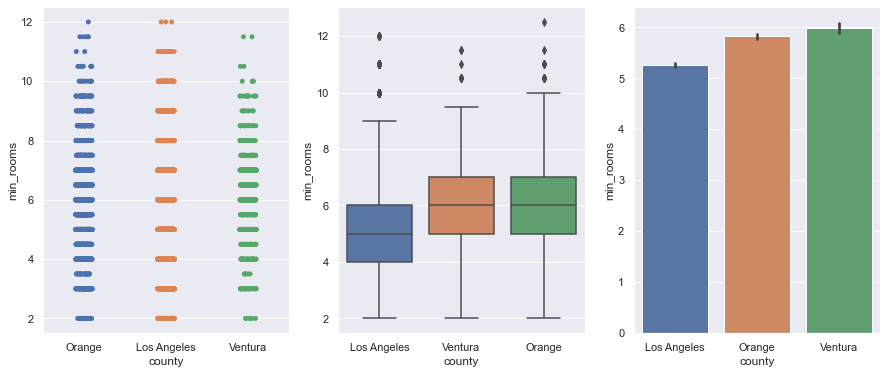

In [22]:
sampling=10_000
sns.set(rc={"figure.figsize":(15, 6)}) 
fig, axes = plt.subplots(1, 3)

sns.stripplot(x='county', y='min_rooms', data=train.sample(sampling), ax = axes[0])
sns.boxplot(x='county', y='min_rooms', data=train.sample(sampling), ax = axes[1])
sns.barplot(x='county', y='min_rooms', data=train.sample(sampling), ax = axes[2])

plt.show

Consider correlations by county.  Subset `train` by county and then perform correlation.

In [23]:
columns = ['bedroomcnt','bathroomcnt','calculatedfinishedsquarefeet','yearbuilt','taxamount','taxvaluedollarcnt']
pairs = combinations(columns, 2)
counties = set(train.county.values)
paired_counties = product(counties, pairs)

outputs = []
for place in paired_counties:
    #print(place)
    #subset the dataframe
    county_subset = train[train.county == place[0]]
    corr, p = stats.pearsonr(county_subset[place[1][0]], county_subset[place[1][1]])
    output = {
        'county':place[0],
        'column1_x_column2':f"{place[1][0]} x {place[1][1]}",
        'r' : corr,
        'p-value' : p,
        'reject_null' : p < alpha
    }
    outputs.append(output)
pd.DataFrame(outputs).sort_values('r', ascending=False)

,county,column1_x_column2,r,p-value,reject_null
14,Los Angeles,taxamount x taxvaluedollarcnt,0.980089,0.0,True
44,Ventura,taxamount x taxvaluedollarcnt,0.975473,0.0,True
29,Orange,taxamount x taxvaluedollarcnt,0.972039,0.0,True
35,Ventura,bathroomcnt x calculatedfinishedsquarefeet,0.834325,0.0,True
20,Orange,bathroomcnt x calculatedfinishedsquarefeet,0.828532,0.0,True
5,Los Angeles,bathroomcnt x calculatedfinishedsquarefeet,0.818324,0.0,True
41,Ventura,calculatedfinishedsquarefeet x taxvaluedollarcnt,0.694918,0.0,True
40,Ventura,calculatedfinishedsquarefeet x taxamount,0.682612,0.0,True
0,Los Angeles,bedroomcnt x bathroomcnt,0.636150,0.0,True
1,Los Angeles,bedroomcnt x calculatedfinishedsquarefeet,0.632353,0.0,True


<a href='#top'>Top</a>

7. Come up with some initial hypotheses based on your goal of predicting property value.

8. Visualize all combinations of variables in some way.

9. Run the appropriate statistical tests where needed.


Looks like the hypotheses that are most strongly correlated are:

- $H_a$ : Houses with more square feet are more expensive

- $H_a$ : Houses with more bathrooms are more expensive

- $H_a$ : Houses with a greater bedroom to bathroom ratio are more expensive

The first two are correlated (<a href='#corrtests'>see question 6</a>).  Just need to check the third.

In [24]:
train['bed_bath_ratio'] = train['bedroomcnt']/train['bathroomcnt']
train[['bed_bath_ratio']].describe()

,bed_bath_ratio
count,1.169019e+06
mean,1.650491e+00
std,5.667489e-01
min,1.666667e-01
25%,1.333333e+00
50%,1.500000e+00
75%,2.000000e+00
max,6.000000e+00


I suspect that the lower the ratio, the more expensive the house.  Generally it would be expensive to have a bathroom for each bedroom.  For example, a modest house might have an ensuite in the master bedroom, but not for the other bedrooms.

Plot the columns.

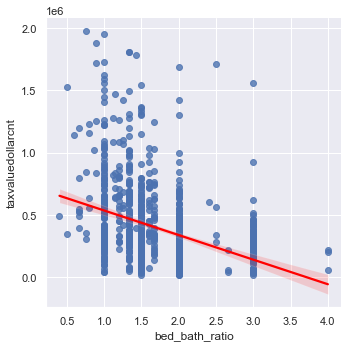

In [28]:
sns.lmplot(x='bed_bath_ratio', y='taxvaluedollarcnt', data=train.sample(1000), line_kws={'color': 'red'})
plt.show()

This appears to confirm my reasoning.  Perform a hypothesis test.

$H_0$ : Houses with a lower bedroom to bathroom ratio are not more expensive (there is no correlation)

In [32]:
corr, p = stats.pearsonr(train['taxvaluedollarcnt'], train['bed_bath_ratio'])
output = {
    'column1_x_column2':f"{'taxvaluedollarcnt'} x {'bed_bath_ratio'}",
    'r' : corr,
    'p-value' : p,
    'reject_null' : p < alpha
}
pd.DataFrame([output])

,column1_x_column2,r,p-value,reject_null
0,taxvaluedollarcnt x bed_bath_ratio,-0.31259,0.0,True


Reject the null; it's a fairly strong negative correlation.

Check `min_rooms` and `calculatedfinishedsquarefeet` (note `min_rooms` $=$ `bedroomcnt` $+$ `bathroomcnt`).

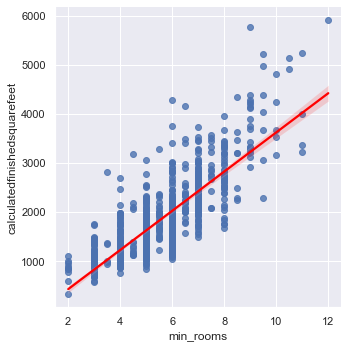

In [31]:
sns.lmplot(x='min_rooms', y='calculatedfinishedsquarefeet', data=train.sample(1000), line_kws={'color': 'red'})
plt.show()

$H_0$ : Houses with a higher number of rooms are not correlated with square feet

In [33]:
corr, p = stats.pearsonr(train['calculatedfinishedsquarefeet'], train['min_rooms'])
output = {
    'column1_x_column2':f"{'calculatedfinishedsquarefeet'} x {'min_rooms'}",
    'r' : corr,
    'p-value' : p,
    'reject_null' : p < alpha
}
pd.DataFrame([output])

,column1_x_column2,r,p-value,reject_null
0,calculatedfinishedsquarefeet x min_rooms,0.799581,0.0,True


Good correlation.  Check `min_rooms` against the target variable.

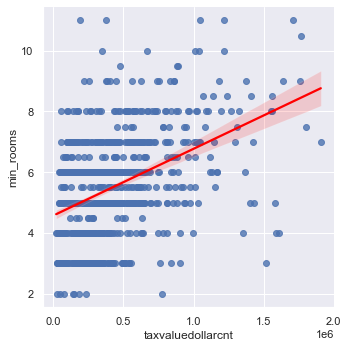

In [34]:
sns.lmplot(x='taxvaluedollarcnt', y='min_rooms', data=train.sample(1000), line_kws={'color': 'red'})
plt.show()

In [35]:
corr, p = stats.pearsonr(train['taxvaluedollarcnt'], train['min_rooms'])
output = {
    'column1_x_column2':f"{'taxvaluedollarcnt'} x {'min_rooms'}",
    'r' : corr,
    'p-value' : p,
    'reject_null' : p < alpha
}
pd.DataFrame([output])

,column1_x_column2,r,p-value,reject_null
0,taxvaluedollarcnt x min_rooms,0.43136,0.0,True


In [40]:
corr_tests[corr_tests['column1_x_column2'].str.contains('taxvaluedollarcnt') & corr_tests['column1_x_column2'].str.contains('calculatedfinishedsquarefeet')]

,column1_x_column2,r,p-value,reject_null
11,calculatedfinishedsquarefeet x taxvaluedollarcnt,0.584173,0.0,True


But calculated square feet is a better correlation.  Probably can drop `bedroomcnt` and `bathroomcnt`.

10. What independent variables are correlated with the dependent variable, home value?

In [46]:
corr_tests[corr_tests['column1_x_column2'].str.contains('taxvaluedollarcnt')].sort_values('r', ascending=False)

,column1_x_column2,r,p-value,reject_null
14,taxamount x taxvaluedollarcnt,0.976078,0.0,True
11,calculatedfinishedsquarefeet x taxvaluedollarcnt,0.584173,0.0,True
8,bathroomcnt x taxvaluedollarcnt,0.508109,0.0,True
13,yearbuilt x taxvaluedollarcnt,0.275143,0.0,True
4,bedroomcnt x taxvaluedollarcnt,0.270649,0.0,True


Every single one is correlated.  `calculatedfinishedsquarefeet` seems to be the best predictor.

11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

In [47]:
corr_tests[~corr_tests['column1_x_column2'].str.contains('taxvaluedollarcnt')].sort_values('r', ascending=False)

,column1_x_column2,r,p-value,reject_null
5,bathroomcnt x calculatedfinishedsquarefeet,0.823408,0.0,True
0,bedroomcnt x bathroomcnt,0.623842,0.0,True
1,bedroomcnt x calculatedfinishedsquarefeet,0.618744,0.0,True
10,calculatedfinishedsquarefeet x taxamount,0.581010,0.0,True
6,bathroomcnt x yearbuilt,0.537905,0.0,True
7,bathroomcnt x taxamount,0.509811,0.0,True
9,calculatedfinishedsquarefeet x yearbuilt,0.484680,0.0,True
2,bedroomcnt x yearbuilt,0.388804,0.0,True
12,yearbuilt x taxamount,0.281635,0.0,True
3,bedroomcnt x taxamount,0.272086,0.0,True


Interestingly `bathroomcnt` is a better predictor of `calculatedfinishedsquarefeet` than `bedroomcnt`, even though bedrooms are probably smaller than bathrooms.  


12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

13. Explore your dataset with any other visualizations you think will be helpful.

#### Appendix cells

Notes:

- do a correlation heat map
- pull categoricals out to make histograms
- compare the counties as greater than
- compare the county and continuous variables to see where they are more different

In [ ]:
def plot_variable_pairs(df):
    pairs = combinations(df.columns, 2)
    for pair in pairs:
        sns.lmplot(x=pair[0], y=pair[1], data=df.sample(1000), line_kws={'color': 'red'})
        plt.show()
        
#plot_variable_pairs(train.drop(columns=['county']))